In [1]:
#Importing packages
#Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
#Sklearn
from sklearn import model_selection, linear_model
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,RepeatedStratifiedKFold,cross_validate
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,auc,roc_auc_score,roc_curve,classification_report

In [2]:
#Others
import random
import pandas as pd
from pandas import DataFrame
from pandas import Series
import numpy as np
import math
import os
import warnings
import optuna
import joblib

In [3]:
#Setting the Work Path
warnings.filterwarnings ('ignore')
#Work Path
os.chdir("C:\\Users\\A\\Desktop\\Bioactive\\EBV")

In [4]:
def Model_results(Model_clf,X_test,y,Cv_model):
    Model_scores= cross_validate(estimator=Model_clf, X=X_test, y=y, cv=Cv_model,scoring=( 'accuracy','f1','precision','recall','roc_auc'), return_train_score=True)
    Model_score= cross_validate(estimator=Model_clf, X=X_test, y=y, cv=Cv_model,scoring=( 'accuracy','f1','precision','recall','roc_auc'), return_train_score=False)
#Accuracy
    Model_Accuracy_test_mean=Model_scores['test_accuracy'].mean()
    Model_Accuracy_test_se=(Model_scores['test_accuracy'].std()/math.sqrt(len(Model_scores['test_accuracy']))) 
    Model_Accuracy_train_mean=Model_scores['train_accuracy'].mean()
    Model_Accuracy_train_se=(Model_scores['train_accuracy'].std()/math.sqrt(len(Model_scores['train_accuracy']))) 
#f1
    Model_f1_mean=Model_score['test_f1'].mean()
    Model_f1_se=(Model_score['test_f1'].std()/math.sqrt(len(Model_score['test_f1']))) 
#precision
    Model_precision_mean=Model_score['test_precision'].mean()
    Model_precision_se=(Model_score['test_precision'].std()/math.sqrt(len(Model_score['test_precision']))) 
#recall
    Model_recall_mean=Model_score['test_recall'].mean()
    Model_recall_se=(Model_score['test_recall'].std()/math.sqrt(len(Model_score['test_recall']))) 
#roc_auc
    Model_roc_auc_mean=Model_score['test_roc_auc'].mean()
    Model_roc_auc_se=(Model_score['test_roc_auc'].std()/math.sqrt(len(Model_score['test_roc_auc']))) 
    Model = {'Mean':[Model_Accuracy_test_mean,Model_Accuracy_train_mean,Model_f1_mean,Model_precision_mean,Model_recall_mean,Model_roc_auc_mean],
        'Se':[Model_Accuracy_test_se,Model_Accuracy_train_se,Model_f1_se,Model_precision_se,Model_recall_se,Model_roc_auc_se]}
    Model = pd.DataFrame(Model, index=['Accuracy_test','Accuracy_train','F1 Score','Precision','Recall','Roc_auc']) # 这里设定了 index 个数要和列表长度一致
    return Model

In [5]:
Cv_optuna= RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=0)
Cv_model= RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=0)
Cv_RFECV= RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)

In [6]:
#Reading the data
ML_data= pd.read_csv("./ML_data.csv",header=0,index_col=0)
X_NAomit_data= pd.read_csv("./X_NAomit_data.csv",header=0,index_col=0)
Raw_data = pd.read_csv('./data_psm.csv',index_col=0)
#original data(descriptors= 4175）
print(X_NAomit_data.shape)
X_NAomit_data.head()

(1146, 3918)


,MW,AMW,Sv,Se,Sp,Si,Mv,Me,Mp,Mi,...,s1_numAroBonds,s2_numAroBonds,s3_numAroBonds,s4_numAroBonds,s34_size,s34_relSize,s34_phSize,s34_phRelSize,chiralMoment,chiralPhMoment
OPTUM_LAB_ID,,,,,,,,,,,,,,,,,,,,,
3185712.0,536.72,7.667429,44.0231,70.4832,46.3981,79.1450,0.628901,1.006903,0.662830,1.130643,...,0.0,3.0,0.0,14.0,31.5,0.828947,9.5,0.250000,40.917043,12.132410
3532333.0,359.86,9.470000,26.6692,38.6617,28.0001,42.2689,0.701821,1.017413,0.736845,1.112339,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
16830460.0,472.41,8.589273,36.4596,55.6470,38.2673,61.9503,0.662902,1.011764,0.695769,1.126369,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
3921421.0,468.59,7.437937,40.7504,62.9996,42.7276,70.2318,0.646832,0.999994,0.678216,1.114790,...,0.0,0.0,6.0,18.0,31.0,0.885714,4.0,0.114286,33.763886,4.472136
1314610.0,353.78,9.561622,26.6701,38.0290,27.0455,41.1431,0.720814,1.027811,0.730959,1.111976,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000


In [10]:
Raw_data

,IsomericSMILES,Activity,Canonical_smiles
OPTUM_LAB_ID,,,
3185712.0,CC1=CC=CC=C1N(C(C2=CC=C(C=C2)N(C)C)C(=O)NCC3CC...,1,Cc1ccccc1N(C(=O)c1snc(C(N)=O)c1N)C(C(=O)NCC1CC...
3532333.0,C1=CC=C2C(=C1)C(=O)N(C(=S)N2)CCC(=O)NC3=CC(=CC...,1,O=C(CCn1c(=S)[nH]c2ccccc2c1=O)Nc1cccc(Cl)c1
16830460.0,CN1CCN(CC1)C2=NN=C(C=C2)C3=CC(=CC=C3)NC(=O)COC...,1,CN1CCN(c2ccc(-c3cccc(NC(=O)COc4ccc(Cl)cc4Cl)c3...
3921421.0,CC1=CC(=NC(=N1)OC(C(=O)O)C(C2=CC=CC=C2)(C3=CC=...,1,Cc1cc(C)nc(OC(C(=O)O)C(OCCc2ccccc2)(c2ccccc2)c...
1314610.0,C1OC2=CC=CC(=C2O1)CNC3=C(N=C(O3)C4=CC=C(C=C4)C...,1,N#Cc1nc(-c2ccc(Cl)cc2)oc1NCc1cccc2c1OCO2
...,...,...,...
664630.0,CCC(=O)N(CC1=CC2=CC=CC=C2NC1=O)C(C)C,0,CCC(=O)N(Cc1cc2ccccc2[nH]c1=O)C(C)C
3228536.0,CN1C2=C(C=C1C(=O)OC(C3=CC=NC=C3)C(=O)NCC4=CC=C...,0,Cn1c(C(=O)OC(C(=O)NCc2ccco2)c2ccncc2)cc2sccc21
666815.0,CN1C2=C(C(=O)N(C1=O)C)N(C(=N2)CN3CCOCC3)CC(=O)...,0,Cn1c(=O)c2c(nc(CN3CCOCC3)n2CC(=O)c2ccccc2)n(C)...


In [11]:
#Data after feature selection (descriptors= 64）
print(ML_data.shape)
ML_data.head()

(1146, 218)


,Ui,QED,TPSA(Tot),NaasC,ESOL,SM12_AEA(ri),Mv,SpMax2_Bh(m),SpMax2_Bh(e),SM1_Dz(Z),...,nR#C-,F02[C-N],GATS4e,C-032,Eig14_EA(dm),MATS5m,CATS2D_04_DD,Eig15_EA(dm),JGI10,F09[N-N]
OPTUM_LAB_ID,,,,,,,,,,,,,,,,,,,,,
3185712.0,0.660860,0.328626,0.408466,0.500000,0.556763,0.623705,0.309924,0.153048,0.654832,0.549136,...,0.0,0.384615,0.405201,0.000000,0.749278,0.594239,0.25,0.84483,0.356238,0.125
3532333.0,0.557528,0.816418,0.194061,0.285714,0.537555,0.501609,0.605445,0.166745,0.670674,0.485696,...,0.0,0.179487,0.600165,0.000000,0.749278,0.288806,0.00,0.84483,0.247234,0.000
16830460.0,0.601664,0.630167,0.110838,0.500000,0.391918,0.610567,0.447717,0.155370,0.659322,0.554790,...,0.0,0.333333,0.369052,0.000000,0.749278,0.585279,0.00,0.84483,0.358655,0.000
3921421.0,0.713339,0.434558,0.142937,0.428571,0.377472,0.575189,0.382590,0.119268,0.665461,0.232338,...,0.0,0.102564,0.581157,0.333333,0.749278,0.456585,0.00,0.84483,0.314003,0.000
1314610.0,0.622248,0.783865,0.139331,0.571429,0.508414,0.685740,0.682416,0.146742,0.722104,0.391917,...,0.0,0.153846,0.706366,0.000000,0.749278,0.431378,0.00,0.84483,0.208924,0.000


# DT

In [12]:
#Data pre-processing of models
X_test_NAomit=np.array(X_NAomit_data)
X_test_ML=np.array(ML_data)
y=Raw_data['Activity'].values
clf=DecisionTreeClassifier(random_state=0)

In [13]:
#Model1 （4175 descriptors）
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X_test_NAomit,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.618095,0.004349
Accuracy_train,1.000000,0.000000
F1 Score,0.619874,0.004630
Precision,0.617681,0.004452
Recall,0.625030,0.006485
Roc_auc,0.618199,0.004353


In [14]:
#Model2 （40 descriptors）
Model2_clf=clf
Model2_clf.fit(X_test_ML, y)
#Model2
Model2=Model_results(Model2_clf,X_test_ML,y,Cv_model)
Model2

,Mean,Se
Accuracy_test,0.612641,0.003988
Accuracy_train,1.000000,0.000000
F1 Score,0.613620,0.004553
Precision,0.612471,0.004038
Recall,0.618333,0.006828
Roc_auc,0.612656,0.003982


In [15]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth',3,5,1),
        'max_features' : trial.suggest_int("max_features",10,20,1),
        'min_samples_split':trial.suggest_int('min_samples_split',2,25,1)
    }
    model = DecisionTreeClassifier(**param,random_state=1)

 
# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X_test_ML, y, n_jobs=8, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy
 
# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=0))
study.optimize(objective, n_trials=100, show_progress_bar=False)


[I 2023-11-14 01:04:57,472] A new study created in memory with name: no-name-171ecc03-d083-44a4-a0b0-af8a56032769
[I 2023-11-14 01:04:59,201] Trial 0 finished with value: 0.6387376048817697 and parameters: {'max_depth': 4, 'max_features': 17, 'min_samples_split': 16}. Best is trial 0 with value: 0.6387376048817697.
[I 2023-11-14 01:04:59,387] Trial 1 finished with value: 0.6402196796338673 and parameters: {'max_depth': 4, 'max_features': 14, 'min_samples_split': 17}. Best is trial 1 with value: 0.6402196796338673.
[I 2023-11-14 01:04:59,589] Trial 2 finished with value: 0.6450900076277651 and parameters: {'max_depth': 4, 'max_features': 19, 'min_samples_split': 25}. Best is trial 2 with value: 0.6450900076277651.
[I 2023-11-14 01:04:59,793] Trial 3 finished with value: 0.6574881769641496 and parameters: {'max_depth': 4, 'max_features': 18, 'min_samples_split': 14}. Best is trial 3 with value: 0.6574881769641496.
[I 2023-11-14 01:04:59,893] Trial 4 finished with value: 0.642768115942028

In [16]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf =DecisionTreeClassifier(max_depth = study.best_params['max_depth']
              ,max_features = study.best_params['max_features']
              #,n_estimators = study.best_params['n_estimators']
              #,learning_rate = study.best_params['learning_rate']
              ,min_samples_split= study.best_params['min_samples_split']
              ,random_state=1)

The best parameters are : 
{'max_depth': 4, 'max_features': 18, 'min_samples_split': 13}


In [17]:
#Model3
Model3=Model_results(clf,X_test_ML,y,Cv_model)
Model3

,Mean,Se
Accuracy_test,0.657575,0.004394
Accuracy_train,0.725063,0.000858
F1 Score,0.660153,0.004815
Precision,0.656969,0.005041
Recall,0.668966,0.007711
Roc_auc,0.691017,0.004760


In [18]:
#Recursive feature elimination
min_features_to_select =5
rfecv = RFECV(estimator=clf,step=1,cv=Cv_RFECV,scoring="accuracy",min_features_to_select=min_features_to_select,n_jobs=8)
rfecv.fit(X_test_ML,y)
columns=Series(ML_data.columns.tolist())[rfecv.support_.tolist()].tolist()

In [19]:
data_dt=ML_data[columns]
data_dt.to_csv("./data_dt.csv",sep=',')
X_DT=np.array(data_dt)

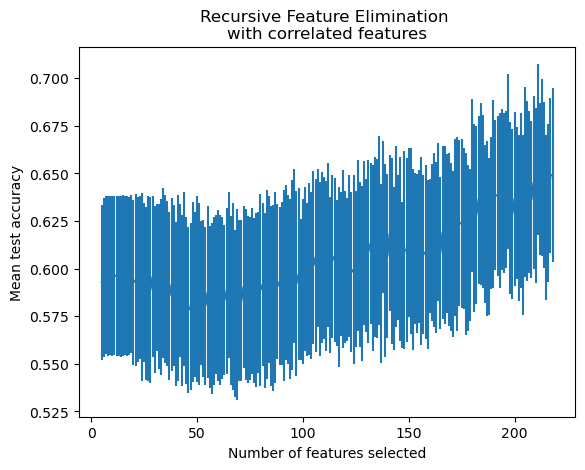

In [20]:
import matplotlib.pyplot as plt
n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [21]:
#Model4 （len(columns) descriptors）
Model4_clf=DecisionTreeClassifier(max_depth = study.best_params['max_depth']
              ,max_features = study.best_params['max_features']
              #,n_estimators = study.best_params['n_estimators']
              #,learning_rate = study.best_params['learning_rate']
              ,min_samples_split= study.best_params['min_samples_split']
              ,random_state=1)
Model4_clf.fit(X_DT, y)
#Model4
Model4=Model_results(Model4_clf,X_DT,y,Cv_model)
Model4


,Mean,Se
Accuracy_test,0.649709,0.004425
Accuracy_train,0.702666,0.001959
F1 Score,0.658270,0.006103
Precision,0.643405,0.004920
Recall,0.687644,0.011783
Roc_auc,0.688747,0.004451


In [22]:
Model4_clf=Model4_clf.fit(X_DT, y)
#Saving the final model
joblib.dump(Model4_clf, './DT.pkl')
DT= joblib.load(filename='./DT.pkl')

In [23]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2,Model3,Model4],axis=1)
Model_data.to_csv("./DT_model_data.csv",sep=',')
Model_data.columns = [['DecisionTree']*8,['Model 1','Model 1', 'Model 2','Model 2', 'Model 3', 'Model 3', 'Model 4', 'Model 4'], ['Mean', 'Se', 'Mean', 'Se', 'Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv('./DT_model_data.csv',encoding='utf-8')
#Read data：pd.read_csv('./Results/DT_model_data.csv',encoding='utf-8',header=[0,1,2])
Model_data

Method         DecisionTree                                                    \
Model               Model 1             Model 2             Model 3             
Values                 Mean        Se      Mean        Se      Mean        Se   
Accuracy_test      0.618095  0.004349  0.612641  0.003988  0.657575  0.004394   
Accuracy_train     1.000000  0.000000  1.000000  0.000000  0.725063  0.000858   
F1 Score           0.619874  0.004630  0.613620  0.004553  0.660153  0.004815   
Precision          0.617681  0.004452  0.612471  0.004038  0.656969  0.005041   
Recall             0.625030  0.006485  0.618333  0.006828  0.668966  0.007711   
Roc_auc            0.618199  0.004353  0.612656  0.003982  0.691017  0.004760   

Method                              
Model            Model 4            
Values              Mean        Se  
Accuracy_test   0.649709  0.004425  
Accuracy_train  0.702666  0.001959  
F1 Score        0.658270  0.006103  
Precision       0.643405  0.004920  
Recall          0.687644  0.011783  
Roc_auc         0.688747  0.004451

# LR

In [24]:
#Data pre-processing of models
X_test_NAomit=np.array(X_NAomit_data)
X_test_ML=np.array(ML_data)
y=Raw_data['Activity'].values
clf=LogisticRegression(solver='liblinear',random_state=0)

In [25]:
#Model1 （4175 descriptors）
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X_test_NAomit,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.733570,0.004051
Accuracy_train,0.785961,0.001108
F1 Score,0.734716,0.004162
Precision,0.732394,0.004439
Recall,0.739622,0.005751
Roc_auc,0.783455,0.004112


In [26]:
#Model2 （40 descriptors）
Model2_clf=clf
Model2_clf.fit(X_test_ML, y)
#Model2
Model2=Model_results(Model2_clf,X_test_ML,y,Cv_model)
Model2

,Mean,Se
Accuracy_test,0.724571,0.003851
Accuracy_train,0.792680,0.000634
F1 Score,0.730214,0.003824
Precision,0.716616,0.004217
Recall,0.746404,0.005089
Roc_auc,0.793083,0.003849


In [27]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    logreg_c = trial.suggest_float("logreg_c", 1e-3,  1e3, log=True)
    l1_ratio = trial.suggest_float("l1_ratio",0.1,1,log=False) 
    #penalty = trial.suggest_categorical("penalty",['l1','l2'])
    max_iter = trial.suggest_int("max_iter", 100,2000)
    model =LogisticRegression(C=logreg_c,
                              max_iter=max_iter,
                              l1_ratio=l1_ratio,
                              solver='liblinear',random_state=1)
    
# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X_test_ML, y, n_jobs=8, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy

# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=1))
study.optimize(objective, n_trials=100, show_progress_bar=False)


[I 2023-11-14 01:10:23,838] A new study created in memory with name: no-name-4594c5ec-8609-4310-82f1-95eef2628e80
[I 2023-11-14 01:10:24,151] Trial 0 finished with value: 0.7250968726163235 and parameters: {'logreg_c': 0.3177840006884068, 'l1_ratio': 0.7482920440979423, 'max_iter': 100}. Best is trial 0 with value: 0.7250968726163235.
[I 2023-11-14 01:10:24,418] Trial 1 finished with value: 0.7227437070938215 and parameters: {'logreg_c': 0.0651621545821569, 'l1_ratio': 0.23208030173540176, 'max_iter': 275}. Best is trial 0 with value: 0.7250968726163235.
[I 2023-11-14 01:10:24,670] Trial 2 finished with value: 0.7009359267734555 and parameters: {'logreg_c': 0.013108749615263334, 'l1_ratio': 0.411004654338743, 'max_iter': 854}. Best is trial 0 with value: 0.7250968726163235.
[I 2023-11-14 01:10:25,064] Trial 3 finished with value: 0.7249244851258583 and parameters: {'logreg_c': 1.7096232052870346, 'l1_ratio': 0.4772750629629653, 'max_iter': 1402}. Best is trial 0 with value: 0.725096872

In [28]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf=LogisticRegression(C=study.best_params['logreg_c'],
                              max_iter=study.best_params['max_iter'],
                              l1_ratio=study.best_params['l1_ratio'],
                              solver='liblinear',
                              random_state=1)

The best parameters are : 
{'logreg_c': 0.20100252801303423, 'l1_ratio': 0.9500458625583988, 'max_iter': 858}


In [29]:
#Model3
Model3=Model_results(clf,X_test_ML,y,Cv_model)
Model3

,Mean,Se
Accuracy_test,0.727985,0.003722
Accuracy_train,0.766996,0.000520
F1 Score,0.734075,0.003746
Precision,0.719054,0.004138
Recall,0.752187,0.005309
Roc_auc,0.792914,0.003974


In [30]:
#Recursive feature elimination
min_features_to_select =5
rfecv = RFECV(estimator=clf,step=1,cv=Cv_RFECV,scoring="accuracy",min_features_to_select=min_features_to_select,n_jobs=8)
rfecv.fit(X_test_ML,y)
columns=Series(ML_data.columns.tolist())[rfecv.support_.tolist()].tolist()

In [31]:
data_lr=ML_data[columns]
data_lr.to_csv("./data_lr.csv",sep=',')
X_LR=np.array(data_lr)

In [32]:
data_lr

,Ui,QED,TPSA(Tot),NaasC,ESOL,Mv,SM1_Dz(Z),nCrs,max_conj_path,SHED_DL,...,MATS3e,F04[N-N],N-072,nR#C-,C-032,Eig14_EA(dm),MATS5m,CATS2D_04_DD,Eig15_EA(dm),JGI10
OPTUM_LAB_ID,,,,,,,,,,,,,,,,,,,,,
3185712.0,0.660860,0.328626,0.408466,0.500000,0.556763,0.309924,0.549136,0.272727,0.321429,0.603786,...,0.630396,0.214286,0.75,0.0,0.000000,0.749278,0.594239,0.25,0.84483,0.356238
3532333.0,0.557528,0.816418,0.194061,0.285714,0.537555,0.605445,0.485696,0.000000,0.285714,0.456095,...,0.365160,0.071429,0.75,0.0,0.000000,0.749278,0.288806,0.00,0.84483,0.247234
16830460.0,0.601664,0.630167,0.110838,0.500000,0.391918,0.447717,0.554790,0.000000,0.428571,0.348494,...,0.599487,0.000000,0.25,0.0,0.000000,0.749278,0.585279,0.00,0.84483,0.358655
3921421.0,0.713339,0.434558,0.142937,0.428571,0.377472,0.382590,0.232338,0.000000,0.214286,0.392639,...,0.729491,0.000000,0.00,0.0,0.333333,0.749278,0.456585,0.00,0.84483,0.314003
1314610.0,0.622248,0.783865,0.139331,0.571429,0.508414,0.682416,0.391917,0.000000,0.392857,0.355359,...,0.521530,0.071429,0.00,0.0,0.000000,0.749278,0.431378,0.00,0.84483,0.208924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664630.0,0.392361,0.974083,0.059772,0.142857,0.695998,0.214437,0.046564,0.000000,0.357143,0.291901,...,0.452315,0.071429,0.50,0.0,0.000000,0.749278,0.516308,0.00,0.84483,0.599010
3228536.0,0.679022,0.489942,0.239850,0.214286,0.612895,0.534852,0.450300,0.000000,0.357143,0.244270,...,0.683061,0.000000,0.25,0.0,0.000000,0.749278,0.574498,0.00,0.84483,0.292866
666815.0,0.533775,0.711572,0.171723,0.285714,0.688216,0.310277,0.361663,0.000000,0.285714,0.000000,...,0.612486,0.071429,0.50,0.0,0.000000,0.749278,0.563380,0.00,0.84483,0.292739


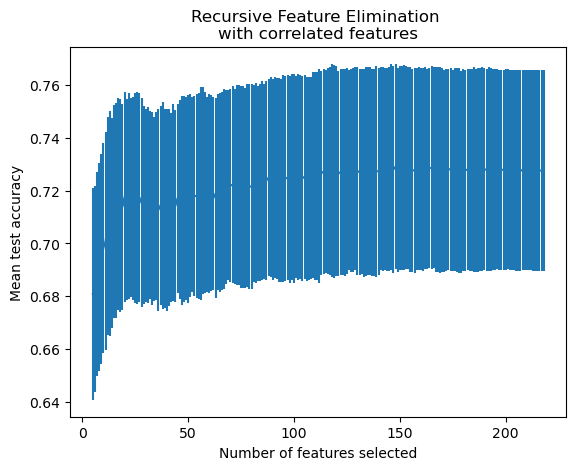

In [33]:
import matplotlib.pyplot as plt

n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [34]:
#Model4 （len(columns) descriptors）
Model4_clf=LogisticRegression(C=study.best_params['logreg_c'],max_iter=study.best_params['max_iter'],solver='liblinear',random_state=0)
#Model4
Model4=Model_results(Model4_clf,X_LR,y,Cv_model)
Model4


,Mean,Se
Accuracy_test,0.737064,0.003678
Accuracy_train,0.767044,0.000540
F1 Score,0.742898,0.003687
Precision,0.727975,0.004154
Recall,0.761101,0.005388
Roc_auc,0.802754,0.003915


In [35]:
Model4_clf=Model4_clf.fit(X_LR, y)
#Saving the final model
joblib.dump(Model4_clf, './LogReg.pkl')
LogReg= joblib.load(filename='./LogReg.pkl')

In [36]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2,Model3,Model4],axis=1)
Model_data.to_csv("./LR_model_data.csv",sep=',')
Model_data.columns = [['LogisticRegression']*8,['Model 1','Model 1', 'Model 2','Model 2', 'Model 3', 'Model 3', 'Model 4', 'Model 4'], ['Mean', 'Se', 'Mean', 'Se', 'Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv('./LR_model_data.csv',encoding='utf-8')
#Read data：pd.read_csv('./Results/LR_model_data.csv',encoding='utf-8',header=[0,1,2])
Model_data

Method         LogisticRegression                                          \
Model                     Model 1             Model 2             Model 3   
Values                       Mean        Se      Mean        Se      Mean   
Accuracy_test            0.733570  0.004051  0.724571  0.003851  0.727985   
Accuracy_train           0.785961  0.001108  0.792680  0.000634  0.766996   
F1 Score                 0.734716  0.004162  0.730214  0.003824  0.734075   
Precision                0.732394  0.004439  0.716616  0.004217  0.719054   
Recall                   0.739622  0.005751  0.746404  0.005089  0.752187   
Roc_auc                  0.783455  0.004112  0.793083  0.003849  0.792914   

Method                                        
Model                      Model 4            
Values                Se      Mean        Se  
Accuracy_test   0.003722  0.737064  0.003678  
Accuracy_train  0.000520  0.767044  0.000540  
F1 Score        0.003746  0.742898  0.003687  
Precision       0.004138  0.727975  0.004154  
Recall          0.005309  0.761101  0.005388  
Roc_auc         0.003974  0.802754  0.003915

# RF

In [37]:
#Data pre-processing of models
X_test_NAomit=np.array(X_NAomit_data)
X_test_ML=np.array(ML_data)
y=Raw_data['Activity'].values
clf=RandomForestClassifier(random_state=0)

In [38]:
#Model1 （4175 descriptors）
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X_test_NAomit,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.717250,0.003664
Accuracy_train,1.000000,0.000000
F1 Score,0.717551,0.003665
Precision,0.718961,0.004577
Recall,0.719413,0.005421
Roc_auc,0.783424,0.003851


In [39]:
#Model2 （40 descriptors）
Model2_clf=clf
Model2_clf.fit(X_test_ML, y)
#Model2
Model2=Model_results(Model2_clf,X_test_ML,y,Cv_model)
Model2

,Mean,Se
Accuracy_test,0.731735,0.003817
Accuracy_train,1.000000,0.000000
F1 Score,0.730435,0.004148
Precision,0.734531,0.004299
Recall,0.729368,0.006037
Roc_auc,0.800754,0.003888


In [40]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators",100,1000,1) #整数型，(参数名称，下界，上界，步长)
    max_depth = trial.suggest_int("max_depth",5,20,1)
    max_features = trial.suggest_int("max_features",5,30,1)
    #max_features = trial.suggest_categorical("max_features",["log2","sqrt","auto"]) #字符型
    min_impurity_decrease = trial.suggest_float("min_impurity_decrease",0,5,log=False) #浮点型
    model = RandomForestClassifier(n_estimators = n_estimators
              ,max_depth = max_depth
              ,max_features = max_features
              ,min_impurity_decrease = min_impurity_decrease
              ,random_state=0
              ,verbose=False
              ,n_jobs=8)

# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X_test_ML, y, n_jobs=8, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy
 
# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=0))
study.optimize(objective, n_trials=100, show_progress_bar=False)

[I 2023-11-14 01:15:08,890] A new study created in memory with name: no-name-daedaf5b-dfb4-4c1d-93bd-cccc93763d4c
[I 2023-11-14 01:15:16,761] Trial 0 finished with value: 0.4973913043478262 and parameters: {'n_estimators': 594, 'max_depth': 16, 'max_features': 20, 'min_impurity_decrease': 2.724415914984484}. Best is trial 0 with value: 0.4973913043478262.
[I 2023-11-14 01:15:23,066] Trial 1 finished with value: 0.4973913043478262 and parameters: {'n_estimators': 481, 'max_depth': 15, 'max_features': 16, 'min_impurity_decrease': 4.4588650039103985}. Best is trial 0 with value: 0.4973913043478262.
[I 2023-11-14 01:15:36,085] Trial 2 finished with value: 0.5 and parameters: {'n_estimators': 968, 'max_depth': 11, 'max_features': 25, 'min_impurity_decrease': 2.644474598764522}. Best is trial 2 with value: 0.5.
[I 2023-11-14 01:15:43,703] Trial 3 finished with value: 0.4973913043478262 and parameters: {'n_estimators': 611, 'max_depth': 19, 'max_features': 6, 'min_impurity_decrease': 0.435646

In [41]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf=RandomForestClassifier(n_estimators = study.best_params['n_estimators']
              ,max_depth = study.best_params['max_depth']
              ,max_features = study.best_params['max_features']
              ,min_impurity_decrease = study.best_params['min_impurity_decrease']
              ,random_state=0
              ,verbose=False
              ,n_jobs=8)

The best parameters are : 
{'n_estimators': 526, 'max_depth': 17, 'max_features': 20, 'min_impurity_decrease': 0.001607989026203961}


In [42]:
#Model3
Model3=Model_results(clf,X_test_ML,y,Cv_model)
Model3

,Mean,Se
Accuracy_test,0.734969,0.003618
Accuracy_train,0.995026,0.000133
F1 Score,0.736189,0.003672
Precision,0.734395,0.004318
Recall,0.741234,0.005632
Roc_auc,0.806601,0.003771


In [43]:
#Recursive feature elimination
min_features_to_select =5
rfecv = RFECV(estimator=clf,step=1,cv=Cv_RFECV,scoring="accuracy",min_features_to_select=min_features_to_select,n_jobs=8)
rfecv.fit(X_test_ML,y)
columns=Series(ML_data.columns.tolist())[rfecv.support_.tolist()].tolist()

In [44]:
data_rf=ML_data[columns]
data_rf.to_csv("./data_rf.csv",sep=',')
X_RF=np.array(data_rf)

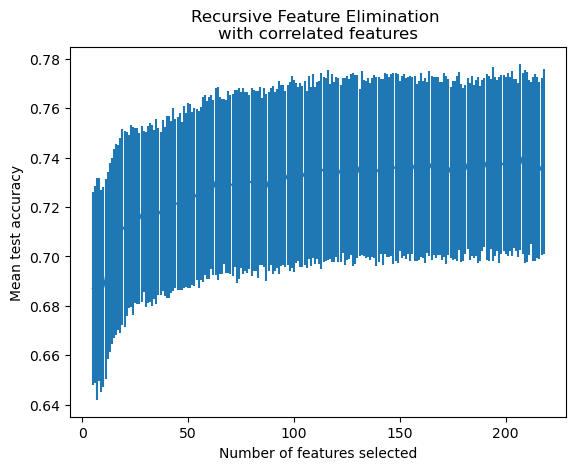

In [45]:
import matplotlib.pyplot as plt
n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [46]:
#Model4 （len(columns) descriptors）
Model4_clf=clf=RandomForestClassifier(n_estimators = study.best_params['n_estimators']
              ,max_depth = study.best_params['max_depth']
              ,max_features = study.best_params['max_features']
              ,min_impurity_decrease = study.best_params['min_impurity_decrease']
              ,random_state=0
              ,verbose=False
              ,n_jobs=8)
Model4_clf.fit(X_RF, y)
#Model4
Model4=Model_results(Model4_clf,X_RF,y,Cv_model)
Model4


,Mean,Se
Accuracy_test,0.735925,0.003746
Accuracy_train,0.995133,0.000125
F1 Score,0.737476,0.003796
Precision,0.734511,0.004314
Recall,0.743479,0.005675
Roc_auc,0.804659,0.003746


In [47]:
Model4_clf=Model4_clf.fit(X_RF, y)
#Saving the final model
joblib.dump(Model4_clf, './RF.pkl')
RF= joblib.load(filename='./RF.pkl')

In [48]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2,Model3,Model4],axis=1)
Model_data.to_csv("./RF_model_data.csv",sep=',')
Model_data.columns = [['RandomForest']*8,['Model 1','Model 1', 'Model 2','Model 2', 'Model 3', 'Model 3', 'Model 4', 'Model 4'], ['Mean', 'Se', 'Mean', 'Se', 'Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv('./RF_model_data.csv',encoding='utf-8')
#Read data：pd.read_csv('./Results/RF_model_data.csv',encoding='utf-8',header=[0,1,2])
Model_data

Method         RandomForest                                                    \
Model               Model 1             Model 2             Model 3             
Values                 Mean        Se      Mean        Se      Mean        Se   
Accuracy_test      0.717250  0.003664  0.731735  0.003817  0.734969  0.003618   
Accuracy_train     1.000000  0.000000  1.000000  0.000000  0.995026  0.000133   
F1 Score           0.717551  0.003665  0.730435  0.004148  0.736189  0.003672   
Precision          0.718961  0.004577  0.734531  0.004299  0.734395  0.004318   
Recall             0.719413  0.005421  0.729368  0.006037  0.741234  0.005632   
Roc_auc            0.783424  0.003851  0.800754  0.003888  0.806601  0.003771   

Method                              
Model            Model 4            
Values              Mean        Se  
Accuracy_test   0.735925  0.003746  
Accuracy_train  0.995133  0.000125  
F1 Score        0.737476  0.003796  
Precision       0.734511  0.004314  
Recall          0.743479  0.005675  
Roc_auc         0.804659  0.003746

# xgboost

In [49]:
#Data pre-processing of models
X_test_NAomit=np.array(X_NAomit_data)
X_test_ML=np.array(ML_data)
y=Raw_data['Activity'].values
clf=xgb.XGBClassifier(random_state=0)

In [50]:
#Model1 （4175 descriptors）
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X_test_NAomit,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.725818,0.003972
Accuracy_train,1.000000,0.000000
F1 Score,0.727610,0.003985
Precision,0.724208,0.004478
Recall,0.733370,0.005283
Roc_auc,0.792217,0.003551


In [51]:
#Model2 （40 descriptors）
Model2_clf=clf
Model2_clf.fit(X_test_ML, y)
#Model2
Model2=Model_results(Model2_clf,X_test_ML,y,Cv_model)
Model2

,Mean,Se
Accuracy_test,0.717947,0.003868
Accuracy_train,1.000000,0.000000
F1 Score,0.719632,0.003987
Precision,0.716081,0.004138
Recall,0.725678,0.005648
Roc_auc,0.785174,0.003661


In [52]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    param = {
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3,1.0,step=0.1),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0, step=0.1),
        'learning_rate': trial.suggest_float('learning_rate', 0.0001, 0.2, step=0.005),
        'n_estimators': trial.suggest_int("n_estimators",50,1000,1)
        #'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
    }
    model = xgb.XGBClassifier(**param,random_state=1,n_jobs=8)

 
# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X_test_ML, y, n_jobs=8, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy

# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=0))
study.optimize(objective, n_trials=100, show_progress_bar=False)


[I 2023-11-14 03:05:58,330] A new study created in memory with name: no-name-aeaafeda-e5fe-4e5b-b201-3f7301040a15
[I 2023-11-14 03:17:30,662] Trial 0 finished with value: 0.7284340198321893 and parameters: {'lambda': 0.15676677195506075, 'alpha': 0.7257005721594281, 'colsample_bytree': 0.7, 'subsample': 0.7000000000000001, 'learning_rate': 0.0801, 'n_estimators': 664}. Best is trial 0 with value: 0.7284340198321893.
[I 2023-11-14 03:21:24,852] Trial 1 finished with value: 0.7249282990083908 and parameters: {'lambda': 0.0562793204741517, 'alpha': 3.6905577292137624, 'colsample_bytree': 1.0, 'subsample': 0.6000000000000001, 'learning_rate': 0.1551, 'n_estimators': 552}. Best is trial 0 with value: 0.7284340198321893.
[I 2023-11-14 03:22:57,821] Trial 2 finished with value: 0.7160244088482076 and parameters: {'lambda': 0.18714500686240676, 'alpha': 5.039489598671215, 'colsample_bytree': 0.3, 'subsample': 0.4, 'learning_rate': 0.0001, 'n_estimators': 841}. Best is trial 0 with value: 0.728

In [53]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf=xgb.XGBClassifier(alpha = study.best_params['alpha']
              ,colsample_bytree = study.best_params['colsample_bytree']
              ,subsample = study.best_params['subsample']
              ,n_estimators = study.best_params['n_estimators']
              ,learning_rate= study.best_params['learning_rate'], n_jobs=8
              ,random_state=0)

The best parameters are : 
{'lambda': 0.07482749063419378, 'alpha': 0.11412488929938644, 'colsample_bytree': 0.5, 'subsample': 0.5, 'learning_rate': 0.0051, 'n_estimators': 607}


In [54]:
#Model3
Model3=Model_results(clf,X_test_ML,y,Cv_model)
Model3

,Mean,Se
Accuracy_test,0.735408,0.003805
Accuracy_train,0.964853,0.000317
F1 Score,0.737702,0.003883
Precision,0.732448,0.004264
Recall,0.745944,0.005723
Roc_auc,0.802707,0.003744


In [55]:
#Recursive feature elimination
min_features_to_select =5
rfecv = RFECV(estimator=clf,step=1,cv=Cv_RFECV,scoring="accuracy",min_features_to_select=min_features_to_select,n_jobs=8)
rfecv.fit(X_test_ML,y)
columns=Series(ML_data.columns.tolist())[rfecv.support_.tolist()].tolist()

In [56]:
data_xgb=ML_data[columns]
data_xgb.to_csv("./data_xgb.csv",sep=',')
X_XGB=np.array(data_xgb)

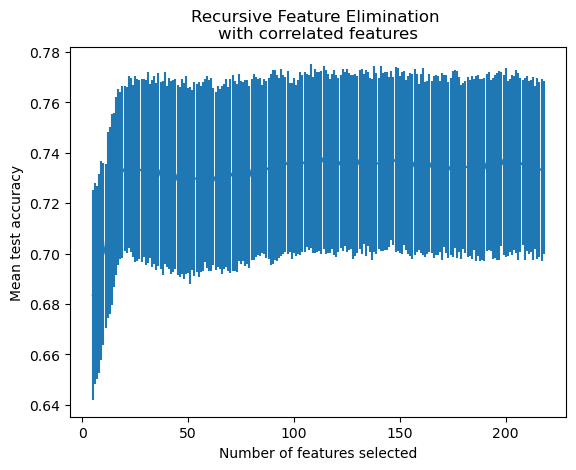

In [57]:
import matplotlib.pyplot as plt
n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [58]:
#Model4 （len(columns) descriptors）
Model4_clf=xgb.XGBClassifier(alpha = study.best_params['alpha']
              ,colsample_bytree = study.best_params['colsample_bytree']
              ,subsample = study.best_params['subsample']
              ,n_estimators = study.best_params['n_estimators']
              ,learning_rate= study.best_params['learning_rate'], n_jobs=8
              ,random_state=0)
Model4_clf.fit(X_XGB, y)
#Model4
Model4=Model_results(Model4_clf,X_XGB,y,Cv_model)
Model4


,Mean,Se
Accuracy_test,0.737679,0.003788
Accuracy_train,0.961528,0.000261
F1 Score,0.739061,0.003895
Precision,0.736233,0.004293
Recall,0.744740,0.005702
Roc_auc,0.806329,0.003623


In [59]:
Model4_clf=Model4_clf.fit(X_XGB, y)
#Saving the final model
joblib.dump(Model4_clf, './XGB.pkl')


In [60]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2,Model3,Model4],axis=1)
Model_data.to_csv("./XGB_model_data.csv",sep=',')
Model_data.columns = [['XGBoost']*8,['Model 1','Model 1', 'Model 2','Model 2', 'Model 3', 'Model 3', 'Model 4', 'Model 4'], ['Mean', 'Se', 'Mean', 'Se', 'Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv('./XGB_model_data.csv',encoding='utf-8')
#Read data：pd.read_csv('./Results/LR_model_data.csv',encoding='utf-8',header=[0,1,2])
Model_data

Method           XGBoost                                                    \
Model            Model 1             Model 2             Model 3             
Values              Mean        Se      Mean        Se      Mean        Se   
Accuracy_test   0.725818  0.003972  0.717947  0.003868  0.735408  0.003805   
Accuracy_train  1.000000  0.000000  1.000000  0.000000  0.964853  0.000317   
F1 Score        0.727610  0.003985  0.719632  0.003987  0.737702  0.003883   
Precision       0.724208  0.004478  0.716081  0.004138  0.732448  0.004264   
Recall          0.733370  0.005283  0.725678  0.005648  0.745944  0.005723   
Roc_auc         0.792217  0.003551  0.785174  0.003661  0.802707  0.003744   

Method                              
Model            Model 4            
Values              Mean        Se  
Accuracy_test   0.737679  0.003788  
Accuracy_train  0.961528  0.000261  
F1 Score        0.739061  0.003895  
Precision       0.736233  0.004293  
Recall          0.744740  0.005702  
Roc_auc         0.806329  0.003623

In [5]:
XGB= joblib.load(filename='./XGB.pkl')
data_xgb=pd.read_csv("./data_xgb.csv",sep=',',header=0,index_col=0)

In [8]:
# Prediction of gelability
X_test_dataframe=pd.read_csv("./X_test_data.csv",sep=',',index_col=0)
X_test_last=X_test_dataframe[data_xgb.columns.to_list()]
X_test=np.array(X_test_last)
X_test_last.head()
#Predicted results
Predicted_data=pd.DataFrame(XGB.predict_proba(X_test),columns=['Probability of nonactivity','Probability of activity'])
Predicted_data.index=X_test_last.index
Predicted_data.sort_values(by="Probability of activity" , inplace=True, ascending=False)
Predicted_data.to_csv("./XGB_predict_data.csv",sep=',')
Predicted_data.head()

,Probability of nonactivity,Probability of activity
cid,,
70021591,0.498730,0.501270
3080864,0.549665,0.450335
449489,0.555031,0.444969
90470199,0.562535,0.437465
3010374,0.568699,0.431300
